In [11]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

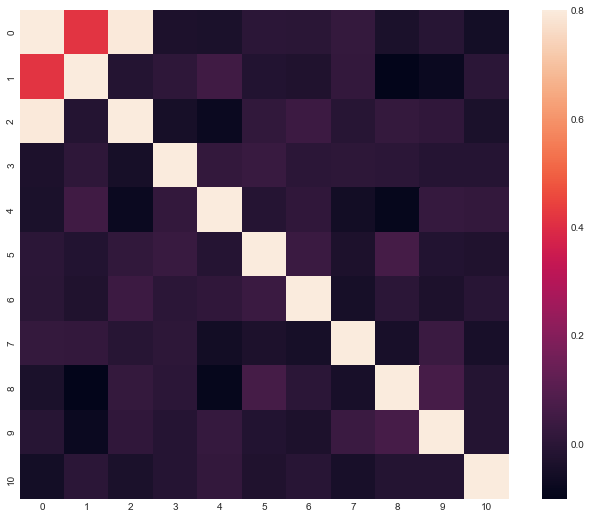

In [12]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.818325942099549
R-squared PLSR: 0.8183253354225547


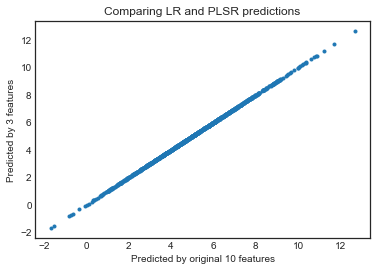

In [25]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred, marker='.') 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [15]:
# Change data points
n_2 = 100

# change features

p_2 = 20

# Create random normally distributed data for new parameters.
X_2 = np.random.normal(size=n_2 * p_2).reshape((n_2, p_2))

# Create normally distributed outcome related to new parameters but with noise.
y_2 = X_2[:, 0] + 3 * X_2[:, 1] + np.random.normal(size=n_2 * 1) + 13


R-squared regression: 0.9169371867447083
R-squared PLSR: 0.9139920931789667


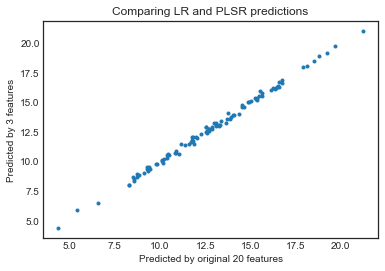

In [26]:
# Fit a linear model with all 20 features.
regr.fit(X_2, y_2)

# Save predicted values.
Y_pred_2 = regr.predict(X_2)
print('R-squared regression:', regr.score(X_2, y_2))

# Fit a linear model using Partial Least Squares Regression.
pls2 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls2.fit(X_2, y_2)

# Save predicted values.
Y_PLS_pred_2 = pls2.predict(X_2)
print('R-squared PLSR:', pls2.score(X_2, y_2))

# Compare the predictions of the two models
plt.scatter(Y_pred_2,Y_PLS_pred_2, marker='.') 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8955440930961039


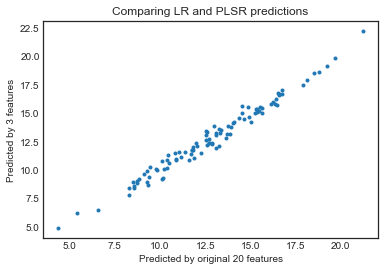

In [22]:
# Only 2 components
pls3 = PLSRegression(n_components=2)
pls3.fit(X_2, y_2)
Y_PLS_pred_3 = pls3.predict(X_2)
print('R-squared PLSR:', pls3.score(X_2, y_2))

# Compare the predictions of the two models
plt.scatter(Y_pred_2,Y_PLS_pred_3, marker='.') 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.9169115158043207


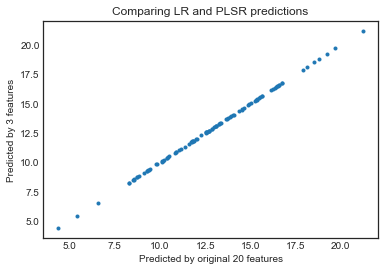

In [27]:
# One more with 5 components in PLSR
pls4 = PLSRegression(n_components=5)
pls4.fit(X_2, y_2)
Y_PLS_pred_4 = pls4.predict(X_2)
print('R-squared PLSR:', pls4.score(X_2, y_2))

# Compare the predictions of the two models
plt.scatter(Y_pred_2,Y_PLS_pred_4, marker='.') 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()